<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from cvxopt import matrix, solvers

Create Dataset:

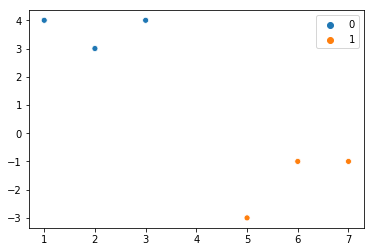

In [2]:
m = NUM_POINTS = 100
n = NUM_FEATURES = 2

CASE = 10

if CASE == 1:
  # 100 Vectors - Few Support Vectors
  X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5, random_state=0)
elif CASE == 2:
  # 4 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]])
  y = np.array([0, 0, 1, 1]).reshape((4,))
  m = 4
  n = 2
elif CASE == 3:
  # 4 Vectors - All Support Vectors (But not really)
  X = np.array([[0, 1], [2, 0], [2, 2], [0, 3]])
  y = np.array([0, 0, 1, 1])
  m = 4
  n = 2
elif CASE == 4:
  # 3 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [2, 0], [0, 2]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2
elif CASE == 5:
  # 3 Vectors - All Support Vectors
  X = np.array([[0, 1], [2, 0], [2, 2]])
  y = np.array([0, 0, 1]).reshape((3,))
  m = 3
  n = 2
elif CASE == 6:
  # 2 Vectors - All Support Vectors
  X = np.array([[1, 1], [2, 2]])
  y = np.array([0, 1]).reshape((2,))
  m = 2
  n = 2
elif CASE == 7:
  # 4 Vectors - 1 Non-Support Vector
  X = np.array([[0, 1], [1, 0], [2, 2], [3, 3]], dtype=np.float64)
  X += np.array([[0.5, 0.8], [0.5, 0.8], [0.5, 0.8], [0.5, 0.8]])
  y = np.array([0, 0, 1, 1]).reshape((4,))
  m = 4
  n = 2
elif CASE == 8:
  # Steven
  X = np.array([[1, 1], [2, 2], [3, 3]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2
elif CASE == 9:
  # Modified Case 4
  X = np.array([[0, 1], [2, 0], [0.1, 2]])
  y = np.array([0, 0, 1])
  m = 3
  n = 2
elif CASE == 10:
  # Online Example
  X = np.array([[3, 4], [1, 4], [2, 3], [6, -1], [7, -1], [5, -3]])
  y = np.array([0, 0, 0, 1, 1, 1])
  m = 6
  n = 2

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

y = 2*y - 1  # Change y to be -1 and 1 instead of 0 and 1


Create F array

In [3]:
def kernel(x1, x2, type):
  if type=='no-kernel':
    return np.dot(x1, x2)

P = np.zeros((m+1, m+1))
for i in range(m):
  for j in range(m):
    P[i, j] = y[i]*y[j]*kernel(X[i], X[j], 'no-kernel')

for i in range(m):
  P[m, i] = y[i]
  P[i, m] = y[i]

P[m, m] = 0
P = matrix(P[:-1, :-1])

print(f'P=\n{P}\n')

#q = -np.ones(m+1)
#q[m] = 0
#q = matrix(q[:-1])
q = matrix(-np.ones((m, 1)))

print(f'q=\n{q}\n')

#G = np.zeros((m+1, m+1))
#for i in range(m):
#  G[i, i] = -1
#G = matrix(G[:-1, :-1])
G = matrix(-np.eye(m))
  
print(f'G=\n{G}\n')

#h = np.zeros(m+1)
#h = matrix(h[:-1])
h = matrix(np.zeros(m))

print(f'h=\n{h}\n')

A = matrix(y.reshape(1, m).astype('double'))

print(f'A=\n{A}\n')

b = matrix(np.zeros(1))

print(f'b=\n{b}\n')

P=
[ 2.50e+01  1.90e+01  1.80e+01 -1.40e+01 -1.70e+01 -3.00e+00]
[ 1.90e+01  1.70e+01  1.40e+01 -2.00e+00 -3.00e+00  7.00e+00]
[ 1.80e+01  1.40e+01  1.30e+01 -9.00e+00 -1.10e+01 -1.00e+00]
[-1.40e+01 -2.00e+00 -9.00e+00  3.70e+01  4.30e+01  3.30e+01]
[-1.70e+01 -3.00e+00 -1.10e+01  4.30e+01  5.00e+01  3.80e+01]
[-3.00e+00  7.00e+00 -1.00e+00  3.30e+01  3.80e+01  3.40e+01]


q=
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]


G=
[-1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00 -0.00e+00]
[-0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -0.00e+00 -1.00e+00]


h=
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]


A=
[-1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00]


b=
[ 0.00e+00]




'\nm,n = X.shape\ny = y.reshape(-1,1) * 1.\nX_dash = y * X\nH = np.dot(X_dash , X_dash.T) * 1.\n\n#Converting into cvxopt format\nP = matrix(H)\nq = matrix(-np.ones((m, 1)))\nG = matrix(-np.eye(m))\nh = matrix(np.zeros(m))\nA = matrix(y.reshape(1, -1))\nb = matrix(np.zeros(1))\n'

Solve System

In [4]:
'''

X_temp = np.copy(X)
y_temp = np.copy(y)
sol_found = False

while not sol_found:
  lambdas = np.linalg.lstsq(F, np.ones(F.shape[0]))
  lambdas = np.maximum(lambdas, 0)
  remove = (lambdas == 0)
  keep = (lambdas != 0)
  if len(remove) == 0:
    sol_found = True
  else:
    F = F[keep]
    F = F[:, keep]
    X_temp = X_temp[keep]
    y_temp = y_temp[keep]
    print(y_temp.shape)
'''

#lambdas = np.linalg.solve(F, B)
#temp = lambdas[-1]
#lambdas = np.maximum(lambdas, 0)
#lambdas[-1] = temp
#print(lambdas)

#keep = [True, True, True, False, True]
#F = F[keep]
#F = F[:, keep]
#lambdas = np.linalg.solve(F, B[keep])
#print(lambdas)

sol = solvers.qp(P, q, G, h, A, b)
lambdas = np.array(sol['x']).reshape(m)
print(lambdas)

     pcost       dcost       gap    pres   dres
 0: -1.8726e-01 -3.1365e-01  9e+00  3e+00  1e+00
 1:  9.8767e-03 -2.0754e-01  3e-01  1e-02  6e-03
 2: -4.7038e-02 -7.8751e-02  3e-02  2e-17  3e-16
 3: -5.9417e-02 -6.3139e-02  4e-03  7e-18  1e-16
 4: -6.2411e-02 -6.2558e-02  1e-04  1e-17  2e-16
 5: -6.2494e-02 -6.2505e-02  1e-05  1e-17  1e-16
 6: -6.2499e-02 -6.2501e-02  2e-06  2e-17  2e-16
 7: -6.2500e-02 -6.2500e-02  2e-07  3e-17  2e-16
 8: -6.2500e-02 -6.2500e-02  3e-08  2e-18  2e-16
Optimal solution found.
[1.20974278e-04 9.36699712e-10 6.23790246e-02 6.24999960e-02
 1.87364759e-09 1.87271889e-09]


Calculate Weights and Bias

In [5]:
W = np.zeros(n)
for i in range(m):
  W += lambdas[i]*y[i]*X[i]

S = np.where(lambdas > 1e-4)[0][0]
#b = lambdas[m]
b = y[S] - np.matmul(X[S], W)

print(W)
print(b)

[ 0.24987903 -0.25012098]
-0.7491531650748484


Graph Decision Boundary

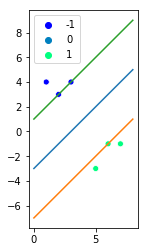

In [6]:
x_min = min(X[:, 0])
x_max = max(X[:, 0])
if W[1] != 0:
  x_plot = np.linspace(x_min-1, x_max+1, 100)
  y_plot = (-W[0]*x_plot - b)/W[1]
  y_plot_2 = (1-W[0]*x_plot - b)/W[1]
  y_plot_3 = (-1-W[0]*x_plot - b)/W[1]
else:
  y_plot = np.linspace(0, 3, 100)
  x_plot = np.array([- b/W[0]]*100).reshape(100,)

fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, palette='winter')
ax.plot(x_plot, y_plot)
ax.plot(x_plot, y_plot_2)
ax.plot(x_plot, y_plot_3)
ax.set_aspect(1.0)
plt.show()